### Q1

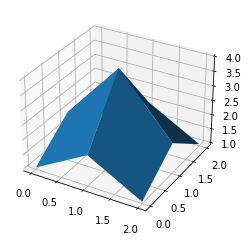

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
axes = plt.axes(projection ='3d')

matrix = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
y, x = matrix.shape
Y = np.arange(0, y, 1)
X = np.arange(0, x, 1)
X, Y = np.meshgrid(X, Y)
w = matrix[X, Y]

axes.plot_surface(X, Y, w)
plt.show()

In [2]:
#given f
conv_matrix = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
])
k_size = conv_matrix.shape

#determing padding size
def pad_size(k_size):
    return k_size // 2

#adding padding to image
def add_pad(img, pad_size):
    
    padded_img = np.zeros(shape=(
        img.shape[0] + pad_size * 2,
        img.shape[1] + pad_size * 2
    ))
    
    padded_img[pad_size:-pad_size, pad_size:-pad_size] = img
    
    return padded_img

def target_size(img_size, kernel_size):
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1
            
    return num_pixels

def imgconv(img, kernel):
    
    tgt_size = target_size(img.shape[0], kernel.shape[0])
    
    i_size = img.shape[0]
    k_size = kernel.shape[0]
    
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    for i in range(tgt_size):
        for j in range(tgt_size):
            mat = img[i:i+k_size, j:j+k_size]
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

[[0. 0. 0. 0. 0.]
 [0. 1. 2. 1. 0.]
 [0. 2. 4. 2. 0.]
 [0. 1. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[3. 6. 3.]
 [4. 8. 4.]
 [3. 6. 3.]]


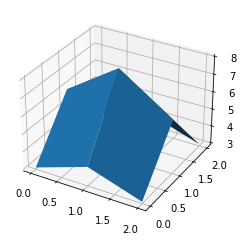

In [3]:
pad_3x3 = pad_size(3)
img_pad_3x3 = add_pad(w, pad_3x3)
print(img_pad_3x3)

convolved_img = imgconv(img_pad_3x3, conv_matrix)
print(convolved_img)

fig = plt.figure() 
axes = plt.axes(projection ='3d')

y, x = convolved_img.shape
Y = np.arange(0, y, 1)
X = np.arange(0, x, 1)
X, Y = np.meshgrid(X, Y)
w_conv = convolved_img[X, Y]

axes.plot_surface(X, Y, w_conv)
plt.show()

### Q2

In [4]:
import skimage.io
import cv2
from scipy import ndimage

image_house = cv2.imread('house-downsampled.png')
gray_house = cv2.cvtColor(image_house, cv2.COLOR_BGR2GRAY)

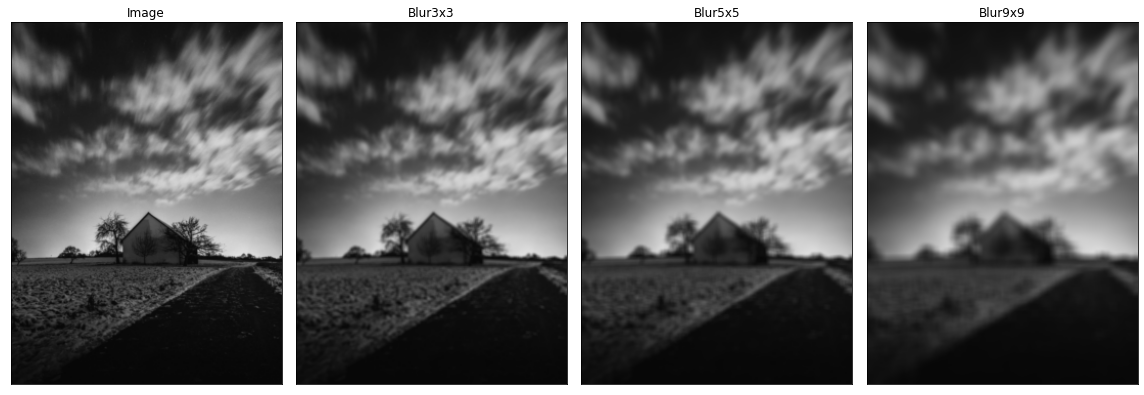

In [5]:
#Average Blur
avg_blur1 = cv2.blur(image_house,(3, 3))
avg_blur2 = cv2.blur(image_house,(5, 5))
avg_blur3 = cv2.blur(image_house,(9, 9))

# Display graphics
titles = ['Image','Blur3x3', 'Blur5x5', 'Blur9x9']
images = [image_house, avg_blur1, avg_blur2, avg_blur3]

plt.figure(figsize=(16, 16))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()   
plt.show()

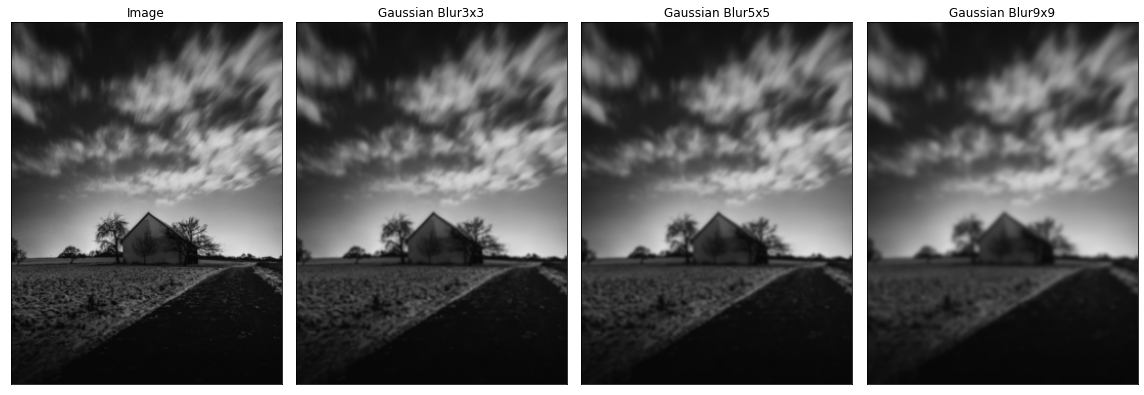

In [6]:
#Gaussian blurring

gaussian_blur1 = cv2.GaussianBlur(image_house,(3, 3), 0)
gaussian_blur2 = cv2.GaussianBlur(image_house,(5, 5), 0)
gaussian_blur3 = cv2.GaussianBlur(image_house,(9, 9), 0) 

# Display graphics
titles = ['Image','Gaussian Blur3x3', 'Gaussian Blur5x5', 'Gaussian Blur9x9']
images = [image_house, gaussian_blur1, gaussian_blur2, gaussian_blur3]

plt.figure(figsize=(16, 16))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()   
plt.show()

<Figure size 1152x1152 with 0 Axes>

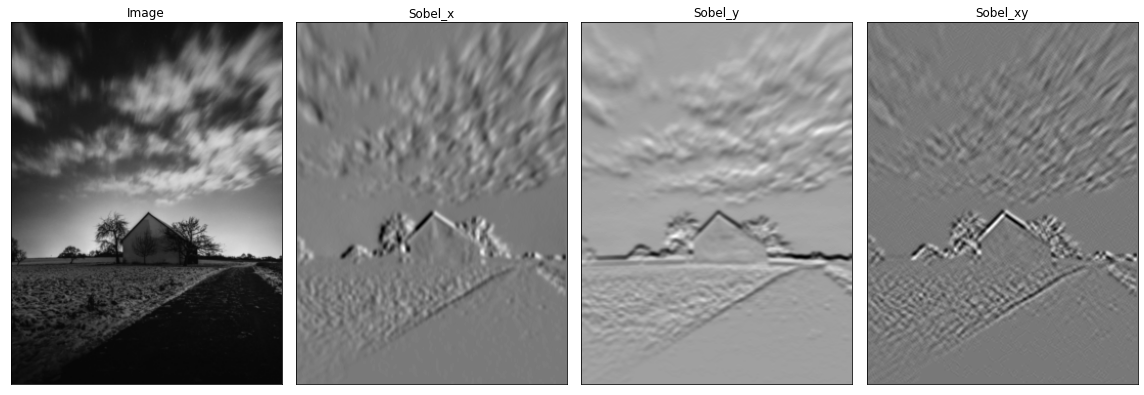

In [7]:
#Sobel Edge Detection

I_gaussian_blur = cv2.GaussianBlur(gray_house,(5,5),2,cv2.BORDER_DEFAULT)

sobel_x = cv2.Sobel(src=I_gaussian_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(src=I_gaussian_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) 
sobel_xy = cv2.Sobel(src=I_gaussian_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)

plt.figure(figsize=(16, 16))

# Display graphics
titles = ['Image','Sobel_x', 'Sobel_y', 'Sobel_xy']
images = [image_house, sobel_x, sobel_y, sobel_xy]

plt.figure(figsize=(16, 16))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()   
plt.show()

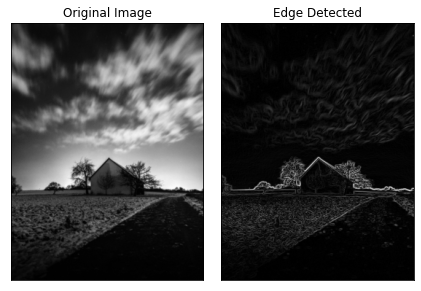

In [8]:
#Robert Edge Detection

robertscrossv = np.array( [[1, 0], [0, -1]] )
robertscrossh = np.array( [[0, 1], [-1, 0]] )

img_house = cv2.imread("house-downsampled.png",0).astype('float64')
img_house/=255.0

vertical = ndimage.convolve(img_house, robertscrossv )
horizontal = ndimage.convolve(img_house, robertscrossh )

edged_img = np.sqrt(np.square(horizontal)+ np.square(vertical))
edged_img*=255

# Display graphics
titles = ['Original Image','Edge Detected']
images = [img_house, edged_img]

for i in range(2):
  plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.tight_layout() 
plt.show()

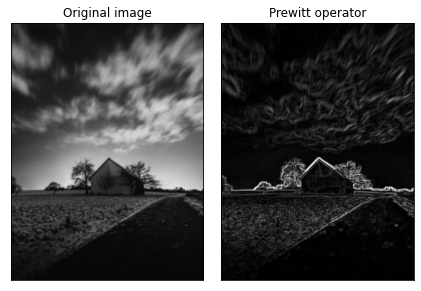

In [9]:
#Prewitt operator

kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)

x = cv2.filter2D(gray_house, cv2.CV_16S, kernelx)
y = cv2.filter2D(gray_house, cv2.CV_16S, kernely)

# Turn uint8, image fusion
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Display graphics
titles = ['Original image','Prewitt operator']
images = [image_house, Prewitt]

for i in range(2):
  plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.tight_layout() 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


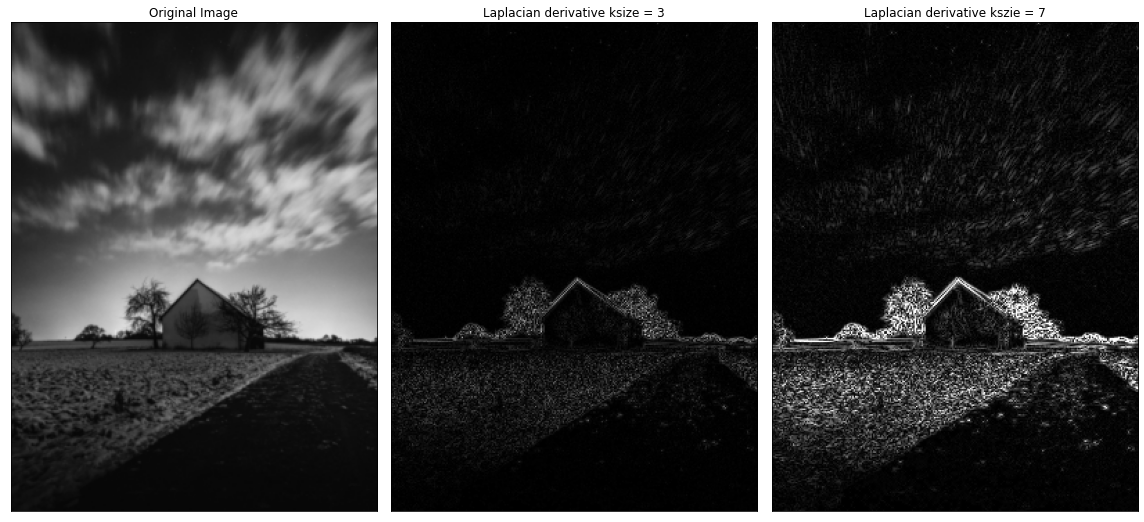

In [10]:
#Laplacian 

lap1 = cv2.Laplacian(image_house, cv2.CV_64F) 
lap1_abs = np.uint(np.absolute(lap1)) 

lap2 = cv2.Laplacian(image_house, cv2.CV_64F, ksize=3) 
lap2_abs = np.uint(np.absolute(lap2)) 

#Display graphics
titles = ['Original Image',"Laplacian derivative ksize = 3", 'Laplacian derivative kszie = 7']
images = [image_house,lap1_abs,lap2_abs]
plt.figure(figsize=(16,16))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

### Q3

Salt & Pepper Noise

In [11]:
# Median Spatial Domain Filtering
 
import cv2
 
noisy_img = cv2.imread('tiger_noise.png', 0)
m, n = noisy_img.shape

img_new = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [noisy_img[i-1, j-1],
               noisy_img[i-1, j],
               noisy_img[i-1, j + 1],
               noisy_img[i, j-1],
               noisy_img[i, j],
               noisy_img[i, j + 1],
               noisy_img[i + 1, j-1],
               noisy_img[i + 1, j],
               noisy_img[i + 1, j + 1]]
         
        temp = sorted(temp)
        img_new[i, j]= temp[4]
        
img_new = img_new.astype(np.uint8)
cv2.imwrite('median_filtered_tiger.png', img_new)

True

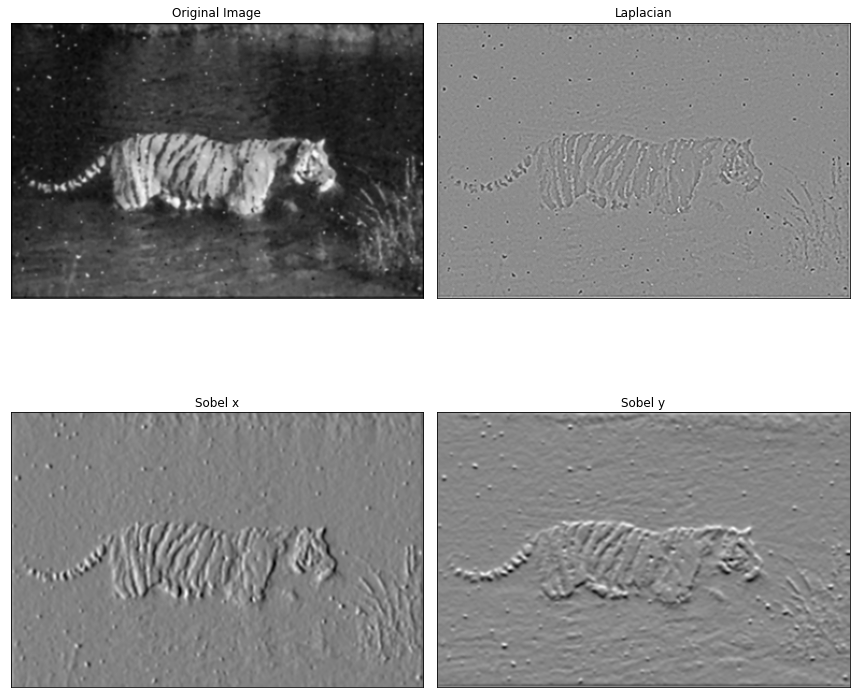

In [12]:
img_tiger = cv2.imread('median_filtered_tiger.png',)
gray_tiger = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2GRAY)

g_img_tiger = cv2.GaussianBlur(gray_tiger, (3, 3), 0)

laplacian = cv2.Laplacian(g_img_tiger, cv2.CV_64F)
sobelx = cv2.Sobel(g_img_tiger, cv2.CV_64F, 1, 0, ksize=5)  
sobely = cv2.Sobel(g_img_tiger, cv2.CV_64F, 0, 1, ksize=5)

#Display graphics
titles = ['Original Image',"Laplacian", "Sobel x", "Sobel y"]
images = [g_img_tiger, laplacian, sobelx, sobely]
plt.figure(figsize=(12,12))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()

In [13]:
sx = ndimage.sobel(g_img_tiger,axis=0,mode='constant')
print(sx)
sy = ndimage.sobel(g_img_tiger,axis=1,mode='constant')
print(sy)

sobel=np.hypot(sx,sy)
plt.show()

[[ 45  74  85 ... 242 193 112]
 [ 28  47  54 ... 158 127  74]
 [ 10  18  24 ...  73  59  35]
 ...
 [243 234 227 ...  49  34  20]
 [203 166 144 ... 175 180 212]
 [155  85  46 ...  38  68 142]]
[[ 45  24   3 ... 218 181 144]
 [ 76  41   4 ... 192 127  64]
 [ 92  52   6 ... 177  97  17]
 ...
 [197 124  59 ...   5 150  60]
 [169 106  48 ... 245 156  72]
 [103  65  28 ... 242 194 140]]


[[  0.          66.          18.         ...   0.         172.
    0.        ]
 [ 68.         141.42842713 127.12198866 ... 344.         364.86709909
  172.        ]
 [  8.         129.4681428   34.20526275 ...  12.64911064 340.2116988
    8.        ]
 ...
 [ 36.         274.56511068  64.28063472 ... 202.05444811 312.24669734
   90.        ]
 [142.         304.21702779 270.26653511 ... 284.7630594  331.11931384
  148.        ]
 [  0.         156.           8.         ...  32.         164.
    0.        ]]
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [ 90.          45.5729387  102.72435569 ...  90.         135.
   90.        ]
 [ 90.         175.12610358  15.2551187  ...  71.56505118   2.02136494
   90.        ]
 ...
 [ 90.          11.55548431  95.35582504 ...  60.00891368 156.80140949
   90.        ]
 [ 90.         136.86478526  87.45519562 ... 101.54669055  43.04193257
   90.        ]
 [  0.           0.           0.         ...   0.           0.
  

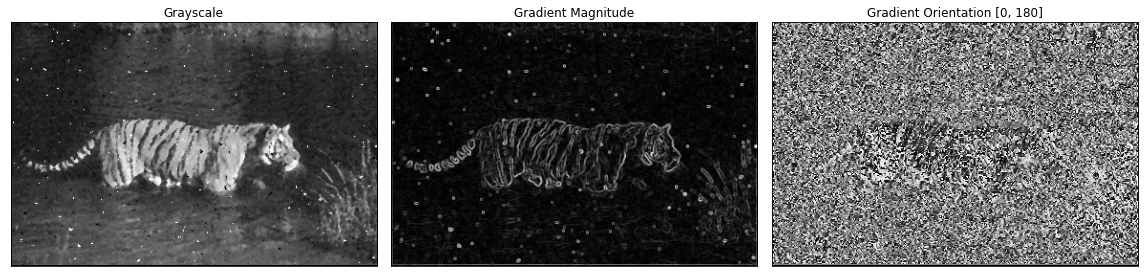

In [14]:
gX = cv2.Sobel(gray_tiger, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray_tiger, cv2.CV_64F, 0, 1)

magnitude = np.sqrt((gX ** 2) + (gY ** 2))
print(magnitude)

orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))

axes[0].imshow(gray_tiger, "gray")
axes[1].imshow(magnitude, "gray")
axes[2].imshow(orientation, "gray")

axes[0].set_title("Grayscale")
axes[1].set_title("Gradient Magnitude")
axes[2].set_title("Gradient Orientation [0, 180]")

for i in range(0, 3):
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

plt.tight_layout()
plt.show()